# Clustering on the basis of Power Consumption

## Problem Statement 

Typically a house in Manhattan comprises of various electrical appliances. Each of these appliances partly contributes to the total energy consumption of the house. If these houses are grouped based on their power usage, it helps to analyze the requirement of electric power in different parts of the city. Also, the insights can be useful to identify the appliances with high and low usage of electricity. In this case study, we consider the power consumption due to various appliances in the house and try to group the houses as per their power consumption.

##  Data Definition 

The dataset represents the electric power consumption in the house. The data definition is as follows:

**Global_active_power**: The global minute-averaged active power of the house (in KW)

**Global_reactive_power**: The global minute-averaged reactive power of the house (in KW)

**Voltage**: The minute-averaged voltage of the house (in volt)

**Global_intensity**: The global minute-averaged current intensity of the house (in ampere)

**Kitchen_consumption**: The power consumption of the appliances in the kitchen (in watt-hour)

**Laundry_consumption**: The power consumption of the appliances in the laundry room (in watt-hour)

**Other_appliances_consumption**: The power consumption of the appliances other than in the kitchen and laundry room (in watt-hour)

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [2]:
data=pd.read_excel(r"power.xlsx")
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [3]:
print("Rows:",data.shape[0])
print("Columns:",data.shape[1])

Rows: 21240
Columns: 7


In [4]:
data.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

In [5]:
data.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

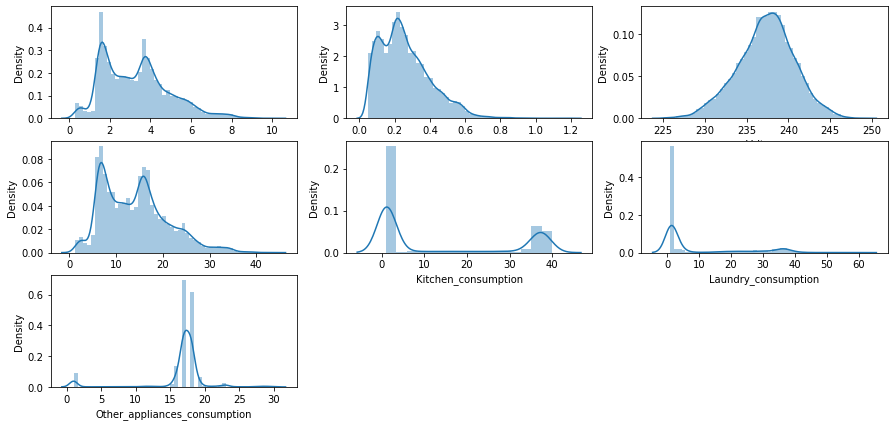

In [6]:
plt.figure(figsize=(15,7))
t=1
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    t+=1   

In [7]:
#Outlier Treatment

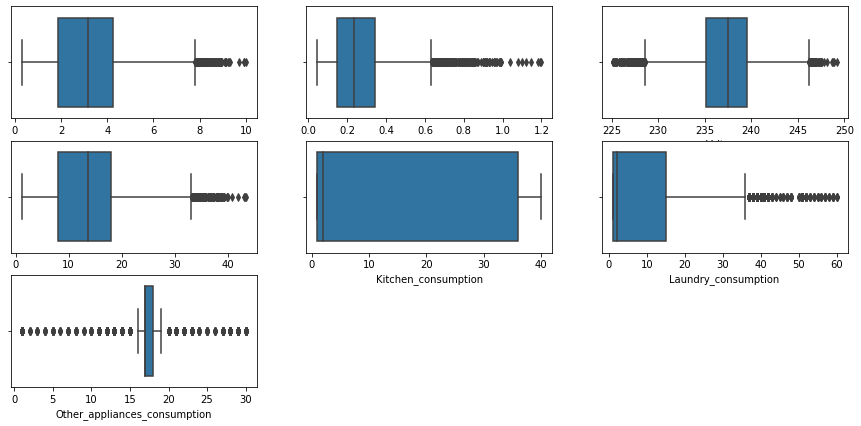

In [8]:
plt.figure(figsize=(15,7))
t=1
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data[i])
    t+=1    

In [9]:
for i in data.select_dtypes(np.number).columns:
    Q1,Q3 = np.quantile(data[i],[0.25,0.75])
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[i] < (Q1 - 3.5 * IQR)) | (data[i] > (Q3 + 3.5 * IQR)))]

In [10]:
data.shape

(19075, 7)

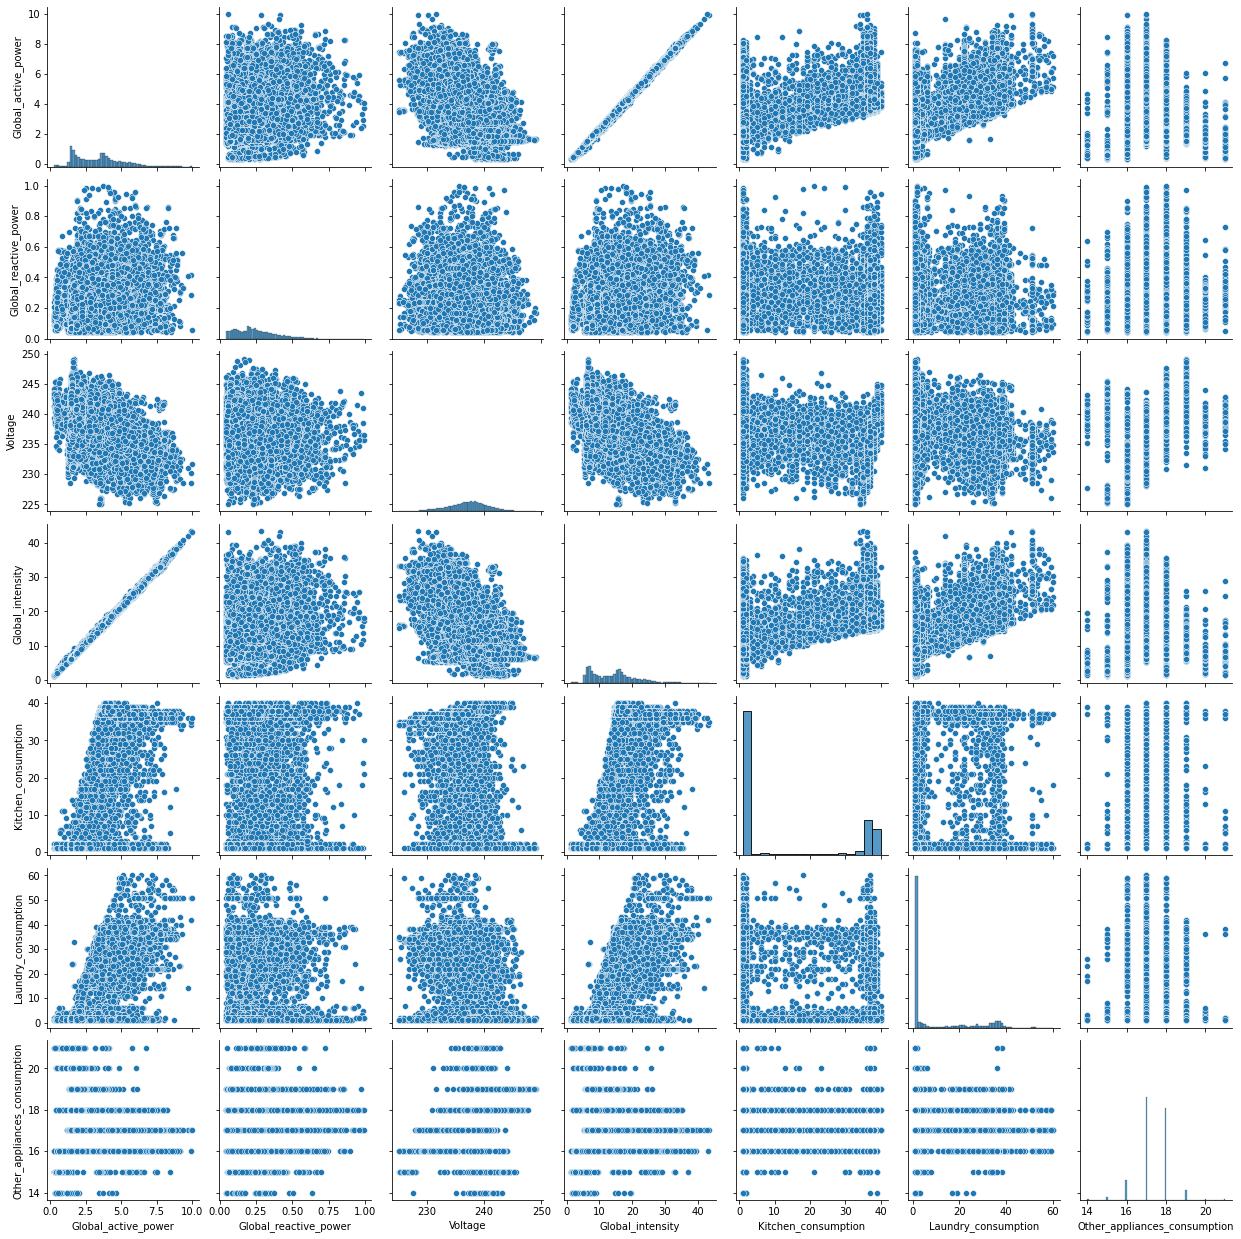

In [11]:
sns.pairplot(data)

In [12]:
raw_data=data.copy()

In [13]:
sc=StandardScaler()
for i in data.columns:
    data[i]=sc.fit_transform(pd.DataFrame(data[i]))

In [14]:
pca=PCA(n_components=7)
pca.fit(data)

PCA(n_components=7)

In [15]:
pca.explained_variance_

array([3.36179439, 1.10833967, 1.07530084, 0.91400655, 0.36966714,
       0.17067116, 0.00058725])

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.48023116, 0.6385571 , 0.79216345, 0.92272897, 0.9755358 ,
       0.99991611, 1.        ])

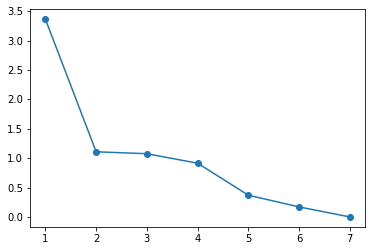

In [17]:
plt.plot(range(1,8),pca.explained_variance_,marker='o')

In [18]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data)
data_pca=pd.DataFrame(data_pca,columns=['PCA1','PCA2'])

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

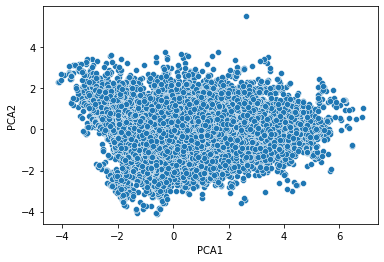

In [21]:
sns.scatterplot(data_pca['PCA1'],data_pca['PCA2'])

## KMeans Model

In [22]:
wcss=[]
sil=[]
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(data_pca)
    pred=kmeans.predict(data_pca)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(data_pca,pred))

In [23]:
print(wcss)
print(sil)

[41000.17397501497, 29993.79525269701, 21834.78774733044, 17302.236743269517, 15334.824093661264, 13475.138980236523]
[0.44981209447974363, 0.3879845879914033, 0.3967888799122841, 0.3918981954970626, 0.38170772936467295, 0.3870463812686393]


In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

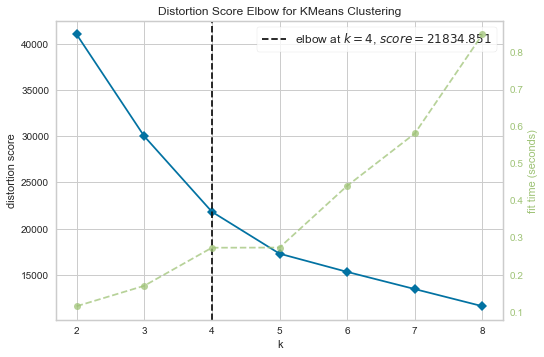

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
k_elbow=KElbowVisualizer(KMeans(),k=8)
k_elbow.fit(data_pca)
k_elbow.show()

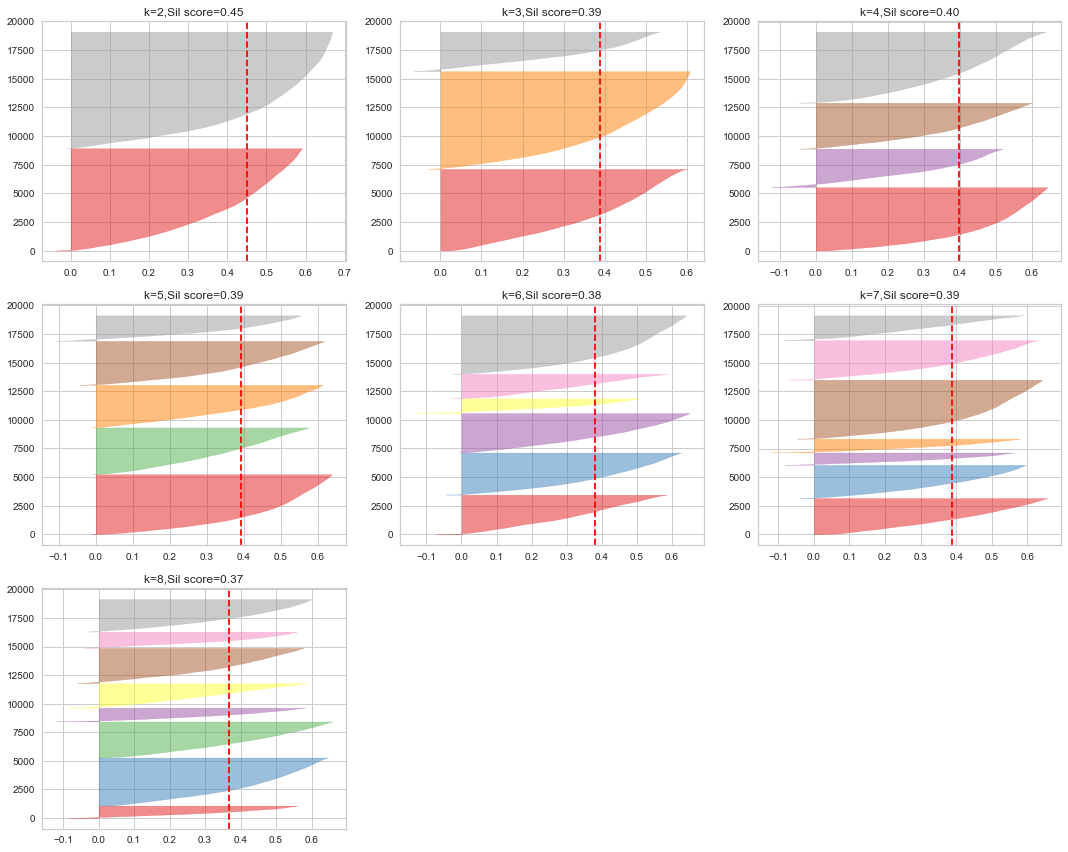

In [26]:
n_clus=[2,3,4,5,6,7,8]
plt.figure(figsize=(15,12))
t=1
for i in n_clus:
    plt.subplot(3,3,t)
    kmeans=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(kmeans)
    sil_viz.fit(data_pca)
    plt.title("k=%s,Sil score=%.2f"%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [27]:
#Let's go with clusters=3

In [28]:
final_kmeans=KMeans(n_clusters=3)
final_kmeans.fit(data_pca)
kmeans_pred=final_kmeans.predict(data_pca)
centroids=final_kmeans.cluster_centers_

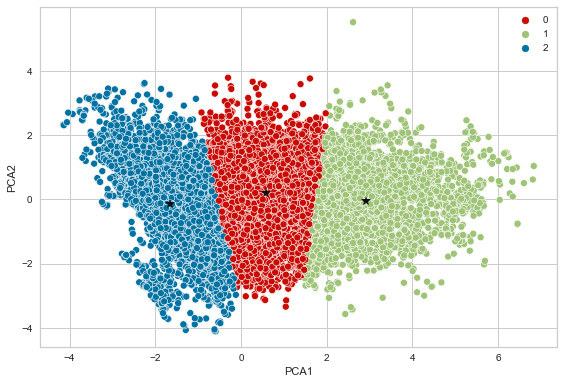

In [29]:
sns.scatterplot(data_pca['PCA1'],data_pca['PCA2'],hue=kmeans_pred,palette=['r','g','b'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=10,color='k')
plt.tight_layout()
plt.show()

In [30]:
raw_data['Label_KMean']=kmeans_pred
raw_data.groupby(by='Label_KMean').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
Label_KMean,,,,,,,
0,3.914576,0.261950,236.844595,16.629766,20.203675,11.043625,17.369337
1,5.841094,0.283403,233.220454,25.098036,26.851363,24.111111,16.739373
2,1.944953,0.235850,239.142109,8.217293,1.643937,2.233392,17.686585


In [31]:
raw_data['Label_KMean']=raw_data['Label_KMean'].map({0:'Low',1:'Average',2:'High'})

In [32]:
raw_data['Total_Consumption']=raw_data.iloc[:,[4,5,6]].sum(axis=1)

<AxesSubplot:xlabel='Global_active_power', ylabel='Total_Consumption'>

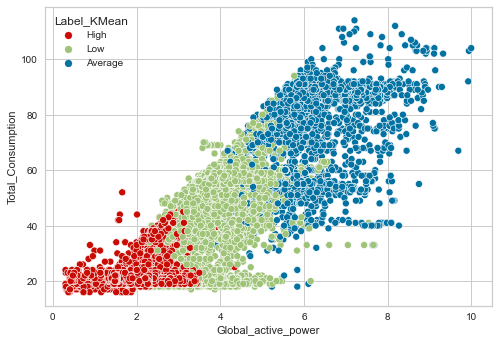

In [33]:
sns.scatterplot(raw_data['Global_active_power'],raw_data['Total_Consumption'],hue=raw_data['Label_KMean'],palette=['r','g','b'])

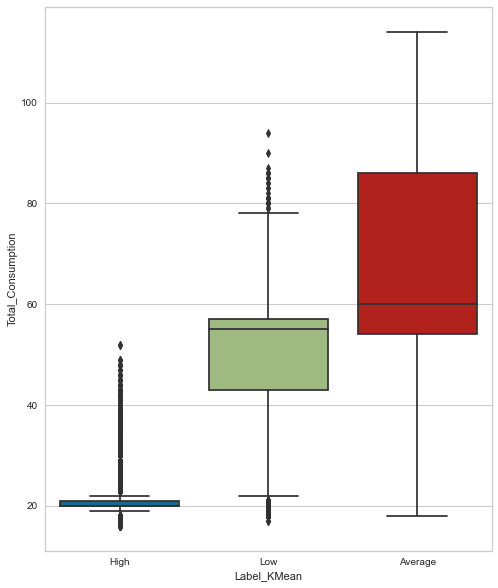

In [34]:
plt.figure(figsize=(8,10))
sns.boxplot(raw_data['Label_KMean'],raw_data['Total_Consumption'])
plt.show()

### Conclusion 
So, there are three groups of appliances / houses having : Low,Average or High Power Consumption